In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import numpy as np

# Q3

In [8]:
#Function which defines log of the Poisson probability. The factorial is replaced by the Sterling approximation to 
#get this form of the log probability
def log_poisson(x, mean):
    prob = x*np.log(mean/x) + x - mean - np.log(np.sqrt(2*np.pi*x))
    return prob

In [9]:
#For 3 sigma
#Start with a mean of 0 keep adding 0.1 to mean until poisson_prob/gaussian_prob <2
mean = 0
sigma = pow(mean, 0.5)
poisson_prob = 100 #Random value to make the while loop work
gaussian_prob = 1  #Random value to make the while loop work
while (poisson_prob/gaussian_prob) >=2:
    mean = mean + 0.1
    sigma = pow(mean, 0.5)
    x = mean + 3*sigma
    gaussian_prob  = stats.norm.pdf(x, mean, sigma)
    poisson_prob = np.exp(log_poisson(x, mean))
n = mean + 3*sigma
print("lambda = {}, ratio of probabilities = {}".format(mean, poisson_prob/gaussian_prob))
print("n for 3 sigma= {}".format(n))

lambda = 8.399999999999986, ratio of probabilities = 1.9995566432842524
n for 3 sigma= 17.094826047713642


In [10]:
#For 5 sigma
#Start with a mean of 0 keep adding 0.1 to mean until poisson_prob/gaussian_prob <2
mean = 0
sigma = pow(mean, 0.5)
poisson_prob = 100  #Random value to make the while loop work
gaussian_prob = 1   #Random value to make the while loop work
while (poisson_prob/gaussian_prob) >=2:
    mean = mean + 0.1
    sigma = pow(mean, 0.5)
    x = mean + 5*sigma
    gaussian_prob  = stats.norm.pdf(x, mean, sigma)
    poisson_prob = np.exp(log_poisson(x, mean))
n = mean + 5*sigma
print("lambda = {}, ratio of probabilities = {}".format(mean, poisson_prob/gaussian_prob))
print("n for 5 sigma= {}".format(n))

lambda = 575.7000000000623, ratio of probabilities = 1.9999281895017167
n for 5 sigma= 695.6687459299984


# Q4

In [12]:
m = [] #Stores the m for each chunk
error_m = [] #Stores the error in m for each chunk
bias_m = [] #Stores m - m_true for each chunk
m_true = 1
for i in range(10000):    
    x = np.linspace(-5,5,51)
    signal = np.exp(-x*x/2) + np.random.randn(51)
    n = np.std(signal)
    N_inv = np.zeros([51,51])
    for i in range(51):
        N_inv[i][i] = 1/n**2
    A = np.zeros([51])
    for i in range(51):
        A[i] = np.exp(-x[i]**2/2)
    lhs = A.T@N_inv@A
    rhs = A.T@N_inv@signal
    m_chunk = rhs/lhs
    error_chunk = np.sqrt(1/lhs)
    m.append(m_chunk)
    error_m.append(error_chunk) 
    bias_m.append(m_chunk - m_true)
bias = np.mean(bias_m)  #Getting the average of m - m_true 
print("Bias is {}. As can be seen, average of m - m_true is very close to 0. So, the least square estimate is unbiased.".format(bias))

Bias is -0.0021597880255318. As can be seen, average of m - m_true is very close to 0. So, the least square estimate is unbiased.


Text(0, 0.5, 'Weighted avg')

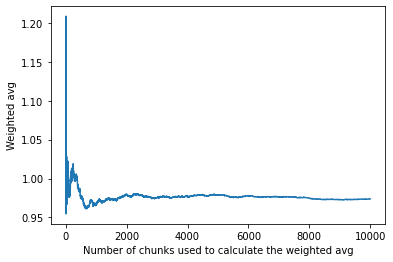

In [17]:
#Getting the weighted average of m for different number of chunks
weighted_avg = []
for i in range(10000):
    numerator = 0
    denominator = 0
    for j in range(i+1):
        numerator += m[j]/error_m[j]**2
        denominator += 1/error_m[j]**2
    weighted_m = numerator/denominator
    weighted_avg.append(weighted_m)
chunks = np.arange(1, 10001, 1)
plt.plot(chunks, weighted_avg)
plt.xlabel("Number of chunks used to calculate the weighted avg")
plt.ylabel("Weighted avg")

As can be seen, as the number of chunks used to calculate the weighted average increases, the value of m tends to be less that 1, and is thus biased low. 

In [23]:
#Weighted avg for 10000 chunks and the bias in our estimate
final_bias = ((weighted_avg[9999] - m_true)/m_true)*100
print("My estimate for the amplitude of the signal = the weighted average of 10000 chunks = {}. Bias in \
the estimate = {}%".format(weighted_avg[9999], final_bias))

My estimate for the amplitude of the signal = the weighted average of 10000 chunks = 0.973751451248865. Bias in the estimate = -2.6248548751135026%


There is a bias in the estimate because the noise and the true signal are both normal distributions. This bias can be mitigated if the noise and true signals have different models/templates